# classification

## Fixing Dr. Oak's pokedex (AGAIN)

Dr Oak's pokedex has fell to the toilet.. __AGAIN__<br> 
after leaving it in rice overnight, it is working again, but has a strange bug<br>
it now cannot identify the pokemon's ~~HP~~ __stage__.  
fortunatily Dr. Oak still has the full data for the original 150 pokemons.
help Dr. Oak create a predictive model to predict ~~HP~~  __stage__ based on other pokemon charecteristics. 
<br>
![Alt text](images/pokedex.gif)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import copy

# old imports from sklearn!
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# new imports from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('pokemon.csv', encoding ='latin1')
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


                 HP    Attack   Defense    Sp_Atk    Sp_Def     Speed  \
HP         1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939   
Attack     0.306768  1.000000  0.491965  0.146312  0.369069  0.194701   
Defense    0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252   
Sp_Atk     0.236649  0.146312  0.187569  1.000000  0.522907  0.411516   
Sp_Def     0.490978  0.369069  0.139912  0.522907  1.000000  0.392656   
Speed     -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000   
Stage      0.249207  0.361321  0.270861  0.391712  0.358308  0.240042   
Legendary  0.172441  0.147486  0.141576  0.334159  0.215314  0.199969   

              Stage  Legendary  
HP         0.249207   0.172441  
Attack     0.361321   0.147486  
Defense    0.270861   0.141576  
Sp_Atk     0.391712   0.334159  
Sp_Def     0.358308   0.215314  
Speed      0.240042   0.199969  
Stage      1.000000  -0.142508  
Legendary -0.142508   1.000000  


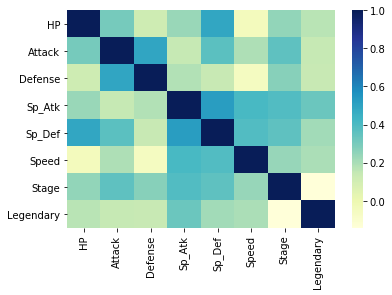

In [3]:
# Calculate correlations
corr = df.drop(['Name', 'Total'], axis=1).corr()
print(corr)
# Heatmap
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

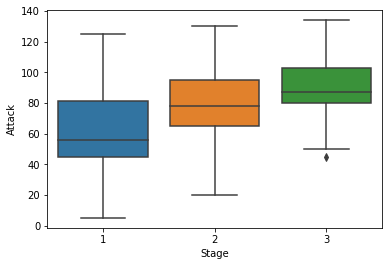

In [4]:
sns.boxplot(x='Stage',y='Attack', data=df)

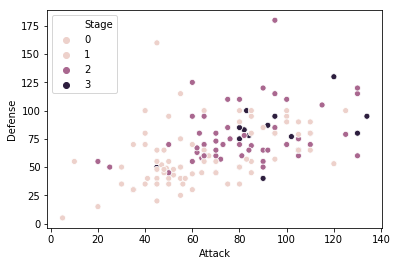

In [5]:
sns.scatterplot(x='Attack', y='Defense', hue='Stage', data=df)

## logistic

In [6]:
X = pd.DataFrame(df['Attack'])
y = pd.DataFrame(df['Stage'])
y = np.ravel(y)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
clf.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2])

In [8]:
clf.predict_proba(X) 


array([[0.68903274, 0.26682366, 0.0441436 ],
       [0.60342623, 0.330052  , 0.06652177],
       [0.45776679, 0.42592316, 0.11631005],
       [0.67024983, 0.28108036, 0.0486698 ],
       [0.58939744, 0.33996899, 0.07063357],
       [0.4429849 , 0.43465911, 0.12235599],
       [0.69514974, 0.26213583, 0.04271443],
       [0.59643546, 0.33501024, 0.0685543 ],
       [0.45036974, 0.43032108, 0.11930918],
       [0.7919201 , 0.18512859, 0.02295131],
       [0.83449664, 0.14957269, 0.01593067],
       [0.7130528 , 0.24829067, 0.03865653],
       [0.7676442 , 0.20494357, 0.02741224],
       [0.81418776, 0.16666119, 0.01915104],
       [0.39910946, 0.45927258, 0.14161797],
       [0.7130528 , 0.24829067, 0.03865653],
       [0.61725652, 0.32014815, 0.06259533],
       [0.47258466, 0.41695935, 0.11045599],
       [0.64425023, 0.30046517, 0.0552846 ],
       [0.46517283, 0.42146826, 0.11335891],
       [0.61725652, 0.32014815, 0.06259533],
       [0.39910946, 0.45927258, 0.14161797],
       [0.

In [9]:
y_true = y
y_pred = clf.predict(X)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.59      0.76      0.66        79
     class 2       0.45      0.39      0.42        56
     class 3       0.00      0.00      0.00        16

    accuracy                           0.54       151
   macro avg       0.35      0.38      0.36       151
weighted avg       0.47      0.54      0.50       151



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
X = pd.DataFrame(df.drop(['Name', 'Type_1', 'Type_2','Total','Stage'], axis=1))
y = pd.DataFrame(df['Stage'])
y = np.ravel(y)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X = pd.DataFrame(df.drop(['Name', 'Type_1', 'Type_2','Total','Stage'], axis=1))
y = pd.DataFrame(df['Stage'])
y = np.ravel(y)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_true = y
y_pred = clf.predict(X)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.84      0.80        79
     class 2       0.59      0.64      0.62        56
     class 3       0.33      0.06      0.11        16

    accuracy                           0.68       151
   macro avg       0.56      0.51      0.51       151
weighted avg       0.65      0.68      0.66       151



## knn

In [13]:
X = pd.DataFrame(df.drop(['Name', 'Type_1', 'Type_2','Total','Stage'], axis=1))
y = pd.DataFrame(df['Stage'])
y = np.ravel(y)

neigh = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
neigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
y_true = y
y_pred = neigh.predict(X)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.92      0.91      0.92        79
     class 2       0.80      0.84      0.82        56
     class 3       0.57      0.50      0.53        16

    accuracy                           0.84       151
   macro avg       0.76      0.75      0.76       151
weighted avg       0.84      0.84      0.84       151



__*notice the metric and weights parameters*__

for knn you must select a hyperparameter K. <br>
let's see how different levels of k change the results.

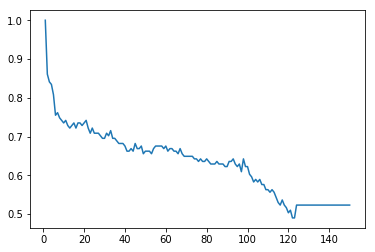

In [15]:
k_vals = [i for i in range(1,151)]
scores = []
for k in k_vals:
    neigh = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    neigh.fit(X, y) 
    scores.append(neigh.score(X,y))

plt.plot(np.array(k_vals), np.array(scores))
plt.show()

## tree

[Text(105.434,215.808,'X[0] <= 53.5\nentropy = 0.578\nsamples = 151\nvalue = [79, 56, 16]'),
 Text(66.1548,198.543,'X[3] <= 110.0\nentropy = 0.226\nsamples = 54\nvalue = [47, 7, 0]'),
 Text(55.129,181.278,'X[5] <= 110.0\nentropy = 0.145\nsamples = 51\nvalue = [47, 4, 0]'),
 Text(44.1032,164.014,'X[2] <= 170.0\nentropy = 0.113\nsamples = 50\nvalue = [47, 3, 0]'),
 Text(33.0774,146.749,'X[1] <= 27.5\nentropy = 0.078\nsamples = 49\nvalue = [47, 2, 0]'),
 Text(22.0516,129.485,'X[5] <= 57.5\nentropy = 0.5\nsamples = 4\nvalue = [2, 2, 0]'),
 Text(11.0258,112.22,'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(33.0774,112.22,'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(44.1032,129.485,'entropy = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(55.129,146.749,'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(66.1548,164.014,'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(77.1806,181.278,'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(144.714,198.543,'X[3] 

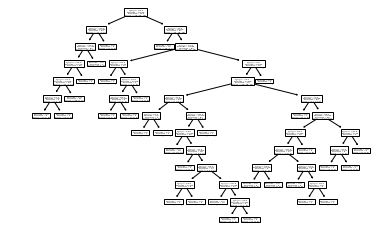

In [16]:
X = pd.DataFrame(df.drop(['Name', 'Type_1', 'Type_2','Total','Stage'], axis=1))
y = pd.DataFrame(df['Stage'])
y = np.ravel(y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

## Random Forest

In [17]:
results = []
for i in range(100):
    BS_DF = df.sample(151, replace = True)
    BS_X = pd.DataFrame(BS_DF.drop(['Name', 'Type_1', 'Type_2','Total','Stage'], axis=1))
    BS_X = BS_X.sample(3, axis=1)
    print(BS_X.columns)
    BS_y = pd.DataFrame(BS_DF['Stage'])
    BS_y = np.ravel(y)

    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf = clf.fit(BS_X, BS_y)
    results.append(pd.DataFrame(clf.predict(BS_X)))

results_df = pd.concat(results, axis=1)


Index(['Sp_Def', 'Defense', 'Legendary'], dtype='object')
Index(['Speed', 'Defense', 'Sp_Atk'], dtype='object')
Index(['Defense', 'Legendary', 'Speed'], dtype='object')
Index(['Attack', 'Legendary', 'Sp_Def'], dtype='object')
Index(['Speed', 'Defense', 'Legendary'], dtype='object')
Index(['Attack', 'Sp_Atk', 'HP'], dtype='object')
Index(['Speed', 'Attack', 'HP'], dtype='object')
Index(['Attack', 'Speed', 'Sp_Atk'], dtype='object')
Index(['Defense', 'HP', 'Legendary'], dtype='object')
Index(['Attack', 'Defense', 'Sp_Def'], dtype='object')
Index(['Sp_Atk', 'Sp_Def', 'HP'], dtype='object')
Index(['Sp_Atk', 'Sp_Def', 'HP'], dtype='object')
Index(['Defense', 'Sp_Atk', 'HP'], dtype='object')
Index(['Sp_Def', 'Sp_Atk', 'Speed'], dtype='object')
Index(['Legendary', 'HP', 'Defense'], dtype='object')
Index(['Defense', 'Sp_Atk', 'Sp_Def'], dtype='object')
Index(['Sp_Atk', 'Defense', 'Sp_Def'], dtype='object')
Index(['HP', 'Defense', 'Sp_Def'], dtype='object')
Index(['Defense', 'Speed', 'HP'], dty

In [18]:
results_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,1,1,1,2,1,1,1,1,1,...,2,1,1,1,1,1,1,1,1,1
0,2,2,3,1,1,2,2,2,2,2,...,1,1,1,1,1,1,2,3,2,1
0,1,1,1,1,2,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,1,1,1,1,2,1,1,1,2,1,...,1,1,1,2,1,2,2,1,2,1
0,2,1,1,1,2,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
preds = results_df.T.mode(axis=0).iloc[0,:]
preds.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [20]:
y_true = y
y_pred = preds
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.52      1.00      0.69        79
     class 2       0.00      0.00      0.00        56
     class 3       0.00      0.00      0.00        16

    accuracy                           0.52       151
   macro avg       0.17      0.33      0.23       151
weighted avg       0.27      0.52      0.36       151



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## real Random Forest
our manual code does not randomly select parameters to consider in every split. 

In [21]:
clf = RandomForestClassifier(n_estimators=3, max_depth=3,random_state=0)
clf.fit(X, y)  

print(X.columns)
print(clf.feature_importances_)


Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary'], dtype='object')
[0.33293855 0.08485015 0.07850197 0.23035664 0.09061067 0.11900675
 0.06373527]


In [22]:
y_true = y
y_pred = clf.predict(X)
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.89      0.90      0.89        79
     class 2       0.70      0.88      0.78        56
     class 3       0.00      0.00      0.00        16

    accuracy                           0.79       151
   macro avg       0.53      0.59      0.56       151
weighted avg       0.72      0.79      0.76       151



# Fixed!

your model has been tested and Dr. Oak decided to use it to fix the pokedex!
the world is now once again whole.
until next time Dr. oak plays pokemon on the toilet.....
